
# Introduction to input-output analysis using Python

Author: <a href="mailto:a.owen@leeds.ac.uk"> Dr Anne Owen </a> 

The general structure of an input-output table is:


<img src="https://user-images.githubusercontent.com/24877051/146377849-723d8122-7e2a-4d0b-b45c-f8351c4fcbb8.png" width=400 height=400 />


Consider this very simple model of the economies of <a href="https://parksandrecreation.fandom.com/wiki/Pawnee,_Indiana"> the town of Pawnee</a> and <a href="https://parksandrecreation.fandom.com/wiki/Eagleton,_Indiana"> the town of Eagleton</a><sup>*</sup>:

<img src="https://github.com/earao/images/blob/main/Picture%201.png?raw=true" width=600 height=470 />

We are going to use the above data to find the GHG emissions for:

<ul>
  <li>Eagleton's Production</li>
  <li>Pawnee's Production</li>
  <li>Eagleton's Consumption</li>
  <li>Pawnee's Consumption</li>
</ul>


But, before we start, paste the following into the box below:

```python
import matplotlib as plt
import numpy as np
import pandas as pd
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
%precision 2
```

<sup>*</sup>Knowledge of <a href="https://parksandrecreation.fandom.com/wiki/Main_Page"> the TV show Parks & Recreation</a> not required for this module

In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
%precision 2

'%.2f'

# 1. Constructing the dataset in Python

## Exercise 1.1: Make arrays for Z,Y and f

In Python use the following code to make the array $\textbf{Z}$

```python
Z_data = np.array([[660,10,2,30,1,1],
                   [300,500,100,20,30,20],
                   [200,400,300,10,30,100],
                   [40,2,1,440,20,2],
                   [20,200,200,140,400,90],
                   [10,30,200,200,200,200]])
```

In [2]:
Z_data = np.array([[660,10,2,30,1,1],
                   [300,500,100,20,30,20],
                   [200,400,300,10,30,100],
                   [40,2,1,440,20,2],
                   [20,200,200,140,400,90],
                   [10,30,200,200,200,200]])

array([[660,  10,   2,  30,   1,   1],
       [300, 500, 100,  20,  30,  20],
       [200, 400, 300,  10,  30, 100],
       [ 40,   2,   1, 440,  20,   2],
       [ 20, 200, 200, 140, 400,  90],
       [ 10,  30, 200, 200, 200, 200]])

Use the same format to make $\textbf{Y}$ and call the variable ```Y_data```

In [3]:
Y_data = np.array([[690,60],
                   [380,20],
                   [330,15],
                   [200,580],
                   [90,200],
                   [100,280]])

array([[690,  60],
       [380,  20],
       [330,  15],
       [200, 580],
       [ 90, 200],
       [100, 280]])

and make $\textbf{f}$, calling the variable ```f_data```. Remember that the format for making a row vector is ```np.array([[number, number, number]])``` with TWO sets of square brackets!

In [4]:
f_data = np.array([[980,1000,1200,1000,1100,1550]])

array([[ 980, 1000, 1200, 1000, 1100, 1550]])

We are going to make use of the Pandas library in Python. Pandas is excellent for handling databases. We are going to turn our array data into dataframes which can include the row and column headings. We can also use more calculation properties available with dataframes.

## Exercise 1.2: Make heading files

Copy the following into the box below:

```python
sectors = ['Eagleton Food',
           'Eagleton Machines',
           'Eagleton Energy',
           'Pawnee Food',
           'Pawnee Machines',
           'Pawnee Energy']
```
 
 to make a heading file for the columns and rows of $\textbf{Z}$

In [5]:
sectors = ['Eagleton Food',
           'Eagleton Machines',
           'Eagleton Energy',
           'Pawnee Food',
           'Pawnee Machines',
           'Pawnee Energy']

['Eagleton Food',
 'Eagleton Machines',
 'Eagleton Energy',
 'Pawnee Food',
 'Pawnee Machines',
 'Pawnee Energy']

Now make another heading file called 'final_demand' which contains the headings 'Eagleton Final Demand' and 'Pawnee Final Demand'

In [6]:
final_demand = ['Eagleton Final Demand',
               'Pawnee Final Demand']

['Eagleton Final Demand', 'Pawnee Final Demand']

## Exercise 1.3: Make dataframes for Z,Y and f

We are going to use the pandas DataFrame function to convert our data into a more useful format.

If you take a look at the notation for this function (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) it says:

class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

Try

```python
Z = pd.DataFrame(Z_data, index=sectors, columns=sectors)
```

In [7]:
Z = pd.DataFrame(Z_data, index=sectors, columns=sectors)

,Eagleton Food,Eagleton Machines,Eagleton Energy,Pawnee Food,Pawnee Machines,Pawnee Energy
Eagleton Food,660,10,2,30,1,1
Eagleton Machines,300,500,100,20,30,20
Eagleton Energy,200,400,300,10,30,100
Pawnee Food,40,2,1,440,20,2
Pawnee Machines,20,200,200,140,400,90
Pawnee Energy,10,30,200,200,200,200


We are telling Python to make a dataframe, where the data is ```Z_data```, the index (the row headings) is ```sectors``` and the columns is ```sectors```

Use this format to make ```Y``` the dataframe for final demand data

In [9]:
Y = pd.DataFrame(Y_data, index=sectors, columns=final_demand)

,Eagleton Final Demand,Pawnee Final Demand
Eagleton Food,690,60
Eagleton Machines,380,20
Eagleton Energy,330,15
Pawnee Food,200,580
Pawnee Machines,90,200
Pawnee Energy,100,280


Paste the following in to the box below to make a dataframes for  ```f```

```f = pd.DataFrame(f_data, columns=sectors)```

In [10]:
f = pd.DataFrame(f_data, columns=sectors)

,Eagleton Food,Eagleton Machines,Eagleton Energy,Pawnee Food,Pawnee Machines,Pawnee Energy
0,980,1000,1200,1000,1100,1550


Dont worry about the zero as the index here - it doesn't really matter.

## Exercise 1.4: Referring to DataFrame items

When we worked with arrays, we could write ```Z_data[2,3]``` to refer to the item in the 3rd row down and 4th column accross (remember Python counts from zero). This value represents the monetary inputs of Eagleton's Energy to making a Pawnee Food product.

With DataFrames we write:
```python
Z.iloc[2,3]
```

In [11]:
Z.iloc[2,3]

10

Notice that ```iloc``` refers to a numerical position.

We can also use the headings to refer to a cell. 

Try 
```python
Z.loc['Eagleton Energy','Pawnee Food']
```

In [12]:
Z.loc['Eagleton Energy','Pawnee Food']

10

Notice that ```loc``` refers to a position by name.

Now if you wanted to extract the complete data of where Eagleton's energy goes to (the Pawnee energy row), you can use:
```python
Z.loc['Eagleton Energy']
```

In [13]:
Z.loc['Eagleton Energy']

Eagleton Food        200
Eagleton Machines    400
Eagleton Energy      300
Pawnee Food           10
Pawnee Machines       30
Pawnee Energy        100
Name: Eagleton Energy, dtype: int64

To extract the column of data showing inputs to Pawnee's Food (the production recipe of Pawnee's food), you can use:
```python
Z['Pawnee Food']
```

Extracting or referring to columns does not require ```loc```

In [14]:
Z['Pawnee Food']

Eagleton Food         30
Eagleton Machines     20
Eagleton Energy       10
Pawnee Food          440
Pawnee Machines      140
Pawnee Energy        200
Name: Pawnee Food, dtype: int64

## Exercise 1.5: Make a vector of total output x

Calculate the column vector of total output. You will need to sum along the rows of both $\textbf{Z}$ and $\textbf{Y}$. We can use ```np.sum('data','dimension')```. Call your variable $\textbf{x}$

Try 
```python
x = np.sum(Z,1) + np.sum(Y,1)
```

In [15]:
x = np.sum(Z,1) + np.sum(Y,1)

Eagleton Food        1454
Eagleton Machines    1370
Eagleton Energy      1385
Pawnee Food          1285
Pawnee Machines      1340
Pawnee Energy        1220
dtype: int64

Scroll back up to the top to check that you have the correct total output figures from the original table.

Lets make it neat by putting it in a dataframe:

```x = pd.DataFrame(x,index=sectors)```

In [16]:
x = pd.DataFrame(x,index=sectors)

,0
Eagleton Food,1454
Eagleton Machines,1370
Eagleton Energy,1385
Pawnee Food,1285
Pawnee Machines,1340
Pawnee Energy,1220


Notice that we can use the numpy function 'sum' with DataFrames. The result $\textbf{x}$ keeps the row headings because it has checked that both $\textbf{Z}$ and $\textbf{Y}$ contain the same sectors

In input-output analysis the sum of the rows is the same as the sum of the columns so we could have added the columns of $\textbf{Z}$ to the value added data. It is best practise to sum along $\textbf{Z}$ and $\textbf{Y}$ however becuase sometimes IO tables do not balance and this data is considered more accurate.

## Exercise 1.6: Finding total production emissions in Eagleton and Pawnee

Can you calculate the total production emissions for Eagleton?

The emissions are held in the emissions vector $\textbf{f}$ and we can either sum the emissions by referring to their position in the vector or by naming the start and end sectors. Here we describe selecting all the rows and the columns between the appropriate headings

Try 
```python
eagleton_production = np.sum(f.loc[:,'Eagleton Food':'Eagleton Energy'], 1)
```

In [38]:
eagleton_production = np.sum(f.loc[:,'Eagleton Food':'Eagleton Energy'], 1)

0    3180
dtype: int64

Or, we can  refering to the locations in numeric form. Python starts to count from zero and to refer to a range of cells, you tell Python the start cell and cell after the one you want to end on.

So we would write:

```python
eagleton_production = np.sum(f.iloc[:,0:3],1)
```

In [39]:
eagleton_production = np.sum(f.iloc[:,0:3],1)

0    3180
dtype: int64

Find the sum of Pawnee's production emissions by referring to the cell labels.

In [40]:
pawnee_production = np.sum(f.loc[:,'Pawnee Food':'Pawnee Energy'], 1)

0    3650
dtype: int64

Now try and use the cell locations in numeric form:

In [41]:
pawnee_production = np.sum(f.iloc[:,3:6],1)

0    3650
dtype: int64

# 2. Make the A matrix 

Now, we want to calculate the emissions from consumption rather than production. This means that we need to be able to calculate emissions $\textbf{f}$ as a function of final demand $\textbf{Y}$.

We start by formulating output $\textbf{x}$ as a function of final demand $\textbf{Y}$.

We know that $\textbf{x}$ = $\textbf{Z}$+$\textbf{Y}$

Which, for a general row $i$ in our matrix, can be written:

$x_i$ = $z_{i1}$ + $z_{i2}$ + $z_{i3}$ + $z_{i4}$ + $z_{i5}$ + $z_{i6}$ + $y_{i1}$ + $y_{i2}$ 

Now we produce a matrix $\textbf{A}$ which shows the contribution each element in $\textbf{Z}$ makes towards total output $\textbf{x}$. Essentially this means dividing each column in $\textbf{Z}$ by the matching element in $\textbf{x}$.

Now:

$a_{ij}$ = $\frac{z_{ij}}{x_j}$

So we can write:

$x_i$ = $a_{i1}{x_1}$ + $a_{i2}{x_2}$ + $a_{i3}{x_3}$ + $a_{i4}{x_4}$ + $a_{i5}{x_5}$ + $a_{i6}{x_6}$ + $y_{i1}$ + $y_{i2}$ 

and so

$\textbf{x}$ = $\textbf{Ax}$+$\textbf{Y}$

$\textbf{Y}$ = $\textbf{x}$ - $\textbf{Ax}$ 

$\textbf{x}$ = $(\textbf{I}$ - $\textbf{A})^{-1}$ $\textbf{Y}$

or

$\textbf{x}$ = $\textbf{L}\textbf{Y}$

$\textbf{L}$ is known as the Leontief inverse and helps us to express output of industry as a function of demand on products. It essentially redistributes output by industry to final demand by product.

In order to calculate $\textbf{L}$ we first have to make $\textbf{A}$.

In Python, the easiest way to do this is an element-wise division where each cell in $\textbf{Z}$ is divided by a second matrix, which has the same dimensions (size) as $\textbf{Z}$ but contains $\textbf{x}$ in row form, repeated down each row.

We are going to call this second matrix ```big_X```

## Exercise 2.1: Make big_X

Try 
```python
big_X = np.tile(np.transpose(x),[6,1])
```



In [42]:
big_X = np.tile(np.transpose(x),[6,1])

array([[1454, 1370, 1385, 1285, 1340, 1220],
       [1454, 1370, 1385, 1285, 1340, 1220],
       [1454, 1370, 1385, 1285, 1340, 1220],
       [1454, 1370, 1385, 1285, 1340, 1220],
       [1454, 1370, 1385, 1285, 1340, 1220],
       [1454, 1370, 1385, 1285, 1340, 1220]])

Can you see how this formula works?

We have tranposed $\textbf{x}$ to make it a row vector, then repeated this 6 times down and once across. We won't turn this into a DataFrame because it is an intermediate step and the row headings would not make sense.

## Exercise 2.2: Make A

Now try 
```python
A = Z/big_X
```

In [43]:
A = Z/big_X

,Eagleton Food,Eagleton Machines,Eagleton Energy,Pawnee Food,Pawnee Machines,Pawnee Energy
Eagleton Food,0.453920,0.007299,0.001444,0.023346,0.000746,0.000820
Eagleton Machines,0.206327,0.364964,0.072202,0.015564,0.022388,0.016393
Eagleton Energy,0.137552,0.291971,0.216606,0.007782,0.022388,0.081967
Pawnee Food,0.027510,0.001460,0.000722,0.342412,0.014925,0.001639
Pawnee Machines,0.013755,0.145985,0.144404,0.108949,0.298507,0.073770
Pawnee Energy,0.006878,0.021898,0.144404,0.155642,0.149254,0.163934


Notice that every cell in $\textbf{A}$ is a number smaller than one. Python is writing these numbers in standard form.

The first cell should be '4.54e-01' or 0.454.

# 3. Calculating L - the Leontief inverse

Leontief's equation is $L = (I-A)^{-1}$

## Exercise 3.1: Make the identity matrix I

Look back at the matrix algebra workbook and make an identity matrix $\textbf{I}$ which is 6 cells wide and long

In [44]:
I = np.identity(6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

## Exercise 3.2: Make L

Now try to make $\textbf{L}$ using Python's ```np.linalg.inv``` function that we also saw in the homework

In [45]:
L = np.linalg.inv(I-A)

array([[1.85, 0.03, 0.01, 0.07, 0.01, 0.  ],
       [0.69, 1.69, 0.18, 0.09, 0.07, 0.06],
       [0.61, 0.67, 1.39, 0.11, 0.1 , 0.16],
       [0.09, 0.02, 0.01, 1.53, 0.04, 0.01],
       [0.34, 0.52, 0.36, 0.32, 1.5 , 0.18],
       [0.22, 0.26, 0.31, 0.36, 0.29, 1.26]])

You should have got a result that looks like this:

```python
array([[ 1.85,  0.03,  0.01,  0.07,  0.01,  0.  ],
       [ 0.69,  1.69,  0.18,  0.09,  0.07,  0.06],
       [ 0.61,  0.67,  1.39,  0.11,  0.1 ,  0.16],
       [ 0.09,  0.02,  0.01,  1.53,  0.04,  0.01],
       [ 0.34,  0.52,  0.36,  0.32,  1.5 ,  0.18],
       [ 0.22,  0.26,  0.31,  0.36,  0.29,  1.26]])```

# 4. Calculating the consumption emissions for Eagleton and Pawnee

Now let $\textbf{e}$ be a vector of emissions intensity - the tonnes of $CO_2$ per unit of output.

$\textbf{e = fx}^{-1}$

multiplying both sides of the Leontief equation by $\textbf{e}$ gives:

$\textbf{ex} = \textbf{eLY}$

which simplifies to:

$\textbf{f} = \textbf{eLY}$

total emissions can be formulated by the product of emissions intensity, the Leontief inverse and final demand. We have emissions as a function of final demand!

We are going to reserve $\textbf{f}$ for the production vector and use $\textbf{q}$ for consumption emissions.

## Exercise 4.1: Calculating e

We cannot  use ```e = f/x``` here because $\textbf{f}$ is a row vector and $\textbf{x}$ is a column vector. For this project, we want $\textbf{e}$ to be a row vector so we must first transpose $\textbf{x}$. Try:

```python
e = f/np.transpose(x)
```

In [46]:
e = f/np.transpose(x)

,Eagleton Food,Eagleton Machines,Eagleton Energy,Pawnee Food,Pawnee Machines,Pawnee Energy
0,0.674003,0.729927,0.866426,0.77821,0.820896,1.270492


Lets make a barchart of e. Try:

```python
chart = e.plot(kind='bar')
chart.set_ylabel('tonnes CO2 per £')
```


Text(0, 0.5, 'tonnes CO2 per £')

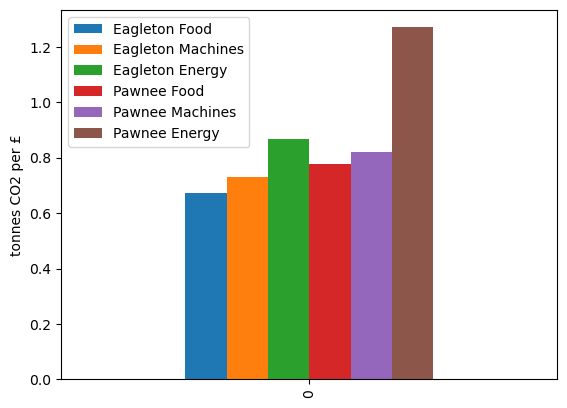

In [47]:
chart = e.plot(kind='bar')
chart.set_ylabel('tonnes CO2 per £')

## Exercise 4.2: Calculating eL

Try ```eL = np.dot(e, L)```

In [48]:
eL = np.dot(e, L)

array([[2.91, 2.6 , 2.04, 2.12, 1.78, 1.93]])

If we want to make a bar chart similar to the one above but for eL we need eL to be a dataframe. But when we use eL for later calculations it needs to stay as an array. Try:

```python
eLdataframe = pd.DataFrame(eL,columns=sectors)
chart = eLdataframe.plot( kind = 'bar')
chart.set_ylabel('tonnes CO2 per £')
```

Text(0, 0.5, 'tonnes CO2 per £')

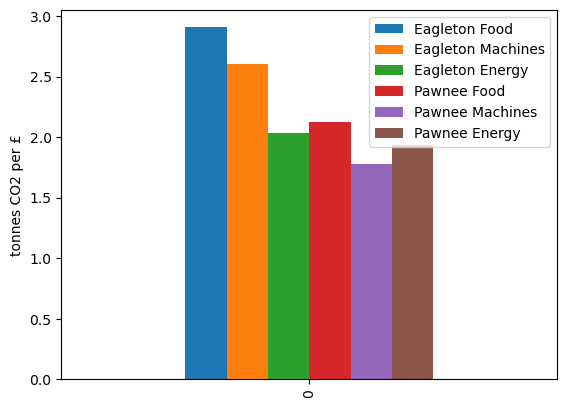

In [49]:
eLdataframe = pd.DataFrame(eL,columns=sectors)
chart = eLdataframe.plot( kind = 'bar')
chart.set_ylabel('tonnes CO2 per £')

Let's think a bit more about what $\textbf{eL}$ represents. We have multiplied emissions intensity of <b>industries</b> by the matrix which translates industry inputs to products. 

$\textbf{eL}$ is therefore the emissions intensity of <b>products</b>

Each number represents the full supply chain emissions per unit spend of a product.

Compare the figures you have for the emissions intensity of an industry with the corresponding product emissions intensity. You should find that they are larger because we are taking account of the full supply chain of production.

Observe that for food, the product emissions intensity is now larger than the product emissions intensity for energy. This is because we are including emissions from highly polluting sectors like energy in the supply chain of a less intensive product like food.

## Exercise 4.3: Calculating Total town level footprints

$\textbf{q = eLY}$. 

We calculated ```eL``` in the previous exercise. Now we need to multiply it by ```Y```. 

Try ```q = np.dot(eL, Y)```

In [50]:
q = np.dot(eL, Y)

array([[4443.62, 2386.38]])

You should find that you have a result matrix of dimension [$1$,$2$]. But what do the numbers mean?

Lets look at the dimensions of $\textbf{e}$, $\textbf{L}$ and $\textbf{Y}$:

[$1$,$6$]  [$6$,$6$]  [$6$,$2$]

The final result is the emissions by final demand region [$1$,$2$] where the $1$ is from the emissions intensity vector $\textbf{e}$  and the $2$ is from the final demand matrix $\textbf{Y}$. So the emissions from Eagleton's consumption are 4443.62 tonnes $CO2$ or the carbon footprint of Eagleton is 4443.62 tonnes $CO2$.

If this reasoning is correct, total emissions should be preserved. Can you check if the sum of the production emissions $\textbf{f}$ is the same as the sum of the consumption emissions $\textbf{q}$ that you have just calculated?

In [52]:
np.sum(q,1)-np.sum(f,1)

0    0.0
dtype: float64

You can make your result into a neat DataFrame like this: 

```total_country_footprints = pd.DataFrame(q,columns=final_demand)```

In [53]:
total_country_footprints = pd.DataFrame(q,columns=final_demand)

,Eagleton Final Demand,Pawnee Final Demand
0,4443.623861,2386.376139


## Exercise 4.4: Calculating product level footprints

If we wanted to breakdown the footprint of each country by product we would need to be pre-multiplying $\textbf{Y}$ by something with 6 product rows rather than the 1 row from eL that we used in Excercise 4.2.

If we diagonalise $\textbf{eL}$, we will make a matrix of products by products. The multiplying this by $\textbf{Y}$ gives 'products by regions'

Try multiplying a diagonalised $\textbf{eL}$ by $\textbf{Y}$ to make ```country_footprints_by_product```.

Use the function ```np.diagflat(eL)``` then multiply by $\textbf{Y}$:

```python
country_footprints_by_product = np.dot(np.diagflat(eL), Y)
```

In [54]:
country_footprints_by_product = np.dot(np.diagflat(eL), Y)

array([[2005.06,  174.35],
       [ 987.92,   52.  ],
       [ 672.28,   30.56],
       [ 424.93, 1232.28],
       [ 160.02,  355.61],
       [ 193.42,  541.58]])

Make your result into a DataFrame called ```country_footprints_by_product```

In [55]:
country_footprints_by_product = pd.DataFrame(country_footprints_by_product,index = sectors, columns=final_demand)

,Eagleton Final Demand,Pawnee Final Demand
Eagleton Food,2005.055530,174.352655
Eagleton Machines,987.922098,51.995900
Eagleton Energy,672.276709,30.558032
Pawnee Food,424.925623,1232.284308
Pawnee Machines,160.022905,355.606456
Pawnee Energy,193.420995,541.578787


 Try:

```python
chart = country_footprints_by_product.plot(kind='bar')
chart.set_ylabel('tonnes CO2 per £')
```

and

```python
chart = country_footprints_by_product.plot(kind='bar', stacked=True)
chart.set_ylabel('tonnes CO2 per £')
```

and

```python
dataframe = country_footprints_by_product.transpose(copy=True)
plot = dataframe.plot(kind='bar', stacked=True)
plot.set_ylabel('tonnes CO2 per £')
```

and

```python
plots = country_footprints_by_product.plot(kind='barh', subplots=True)
```

array([<Axes: title={'center': 'Eagleton Final Demand'}>,
       <Axes: title={'center': 'Pawnee Final Demand'}>], dtype=object)

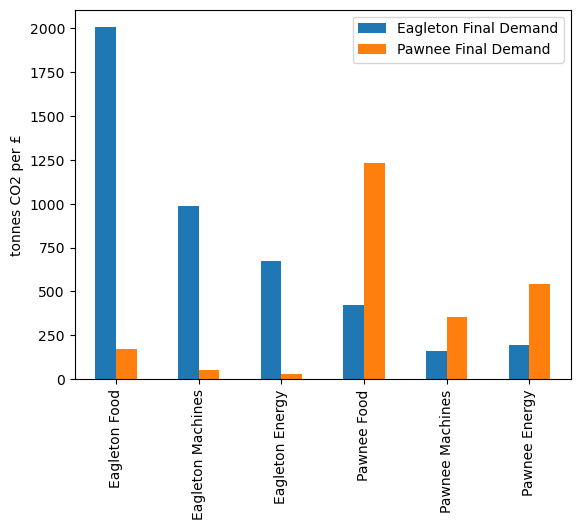

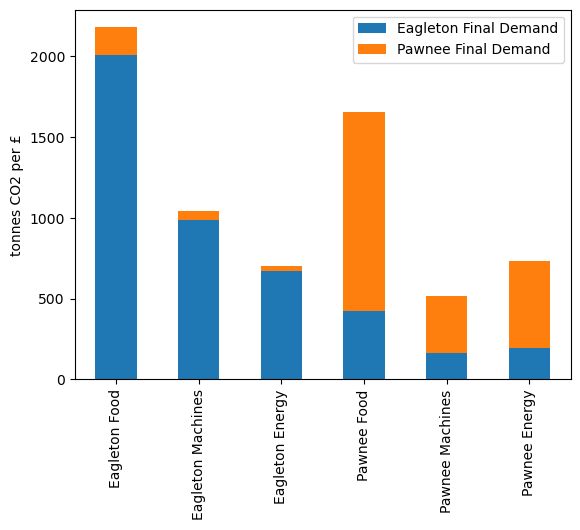

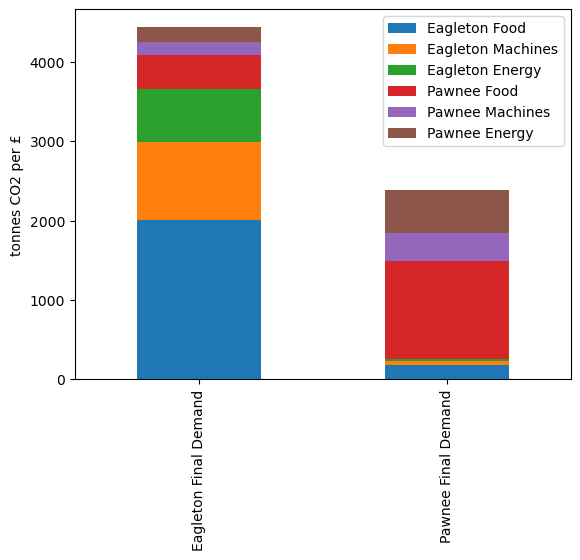

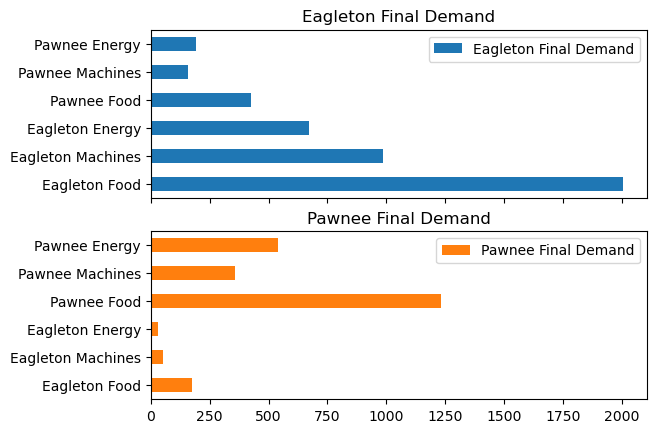

In [57]:
chart = country_footprints_by_product.plot(kind='bar')
chart.set_ylabel('tonnes CO2 per £')

chart = country_footprints_by_product.plot(kind='bar', stacked=True)
chart.set_ylabel('tonnes CO2 per £')

dataframe = country_footprints_by_product.transpose(copy=True)
plot = dataframe.plot(kind='bar', stacked=True)
plot.set_ylabel('tonnes CO2 per £')

plots = country_footprints_by_product.plot(kind='barh', subplots=True)

## Exercise 4.5 Calculating emissions by source industry and end product

First make a new variable ```y_eagleton``` which extracts Eagleton's final demand column

In [58]:
y_eagleton = Y['Eagleton Final Demand']

Eagleton Food        690
Eagleton Machines    380
Eagleton Energy      330
Pawnee Food          200
Pawnee Machines       90
Pawnee Energy        100
Name: Eagleton Final Demand, dtype: int64

Do the same for Pawnee and make ```y_pawnee```

In [59]:
y_pawnee = Y['Pawnee Final Demand']

Eagleton Food         60
Eagleton Machines     20
Eagleton Energy       15
Pawnee Food          580
Pawnee Machines      200
Pawnee Energy        280
Name: Pawnee Final Demand, dtype: int64

We now want to make two separate footprint result matrices. One for Eagleton and one for Pawnee. In each matrix, we want the columns to represent final products and the rows to be source industries.

Using these matrices we can sum the columns to find the product footprints as shown in <b>Exercise 4.4</b>. But more interestingly, we can look at the composition of industries (and associated emissions) that are used to make a product.

To do this, we will need to ensure that our multiplication gives a result of dimension $[6,6]$ 

The first matrix needs to be an 'industry by industry' matrix

$\textbf{L}$ is 'industry by product' matrix

then the final matrix is a 'product by product' matrix

The best way to do this is to diagonalise both ```e``` and ```y_eagleton```

try: 
```python
eagleton_footprint_full = np.dot(np.dot(np.diagflat(e.values), L), np.diag(y_eagleton))
```

In [60]:
eagleton_footprint_full = np.dot(np.dot(np.diagflat(e.values), L), np.diag(y_eagleton))

array([[8.59e+02, 6.70e+00, 1.67e+00, 9.17e+00, 3.19e-01, 2.47e-01],
       [3.47e+02, 4.67e+02, 4.36e+01, 1.35e+01, 4.91e+00, 4.25e+00],
       [3.67e+02, 2.22e+02, 3.97e+02, 1.89e+01, 8.01e+00, 1.38e+01],
       [4.71e+01, 5.33e+00, 2.86e+00, 2.38e+02, 2.47e+00, 5.95e-01],
       [1.94e+02, 1.62e+02, 9.70e+01, 5.24e+01, 1.11e+02, 1.47e+01],
       [1.90e+02, 1.24e+02, 1.30e+02, 9.25e+01, 3.36e+01, 1.60e+02]])

This is actually a $[6,6]$ array of Eagleton's total footprint. The columns are the products and the rows are the breakdown of the supply chain - what industries are involved in making the product.

You'll notice that you used ```np.diag(y_eagleton)``` rather than ```np.diagflat(y_eagleton)```. The reason for this is because when you select a single column from a matrix, python sees this as having zero width, just length and we have to use a different function. 

You'll also notice that we are refering to ```e.values``` before we diagonalise it. This is simply to make the calculation work with elements that are all arrays (rather than dataframes).

It's annoying but the above code should work for you. 

Now make ```eagleton_footprint_full``` into a dataframe:

```python
eagleton_footprint_full = pd.DataFrame(eagleton_footprint_full, index=sectors, columns=sectors)
```

In [61]:
eagleton_footprint_full = pd.DataFrame(eagleton_footprint_full, index=sectors, columns=sectors)

,Eagleton Food,Eagleton Machines,Eagleton Energy,Pawnee Food,Pawnee Machines,Pawnee Energy
Eagleton Food,858.795113,6.704774,1.673607,9.167497,0.319417,0.246643
Eagleton Machines,347.366676,467.464696,43.644197,13.529921,4.905354,4.252255
Eagleton Energy,367.461070,222.124671,396.910395,18.872673,8.006738,13.793595
Pawnee Food,47.134515,5.328787,2.861154,238.448912,2.468680,0.594996
Pawnee Machines,194.120382,162.194593,96.982079,52.415932,110.723850,14.652393
Pawnee Energy,190.177775,124.104578,130.205276,92.490689,33.598866,159.881113


## Exercise 4.6: What does this result matrix mean?

What happens if you sum down the columns of ```eagleton_footprint_full```, remember to sum down the columns, use ```0``` as the dimension with ```np.sum```

In [63]:
np.sum(eagleton_footprint_full,0)

Eagleton Food        2005.055530
Eagleton Machines     987.922098
Eagleton Energy       672.276709
Pawnee Food           424.925623
Pawnee Machines       160.022905
Pawnee Energy         193.420995
dtype: float64

Where have you seen these numbers before? Scroll up and check <b>Exercise 4.4</b>. You should notice that the column sum is the product footprint.

Try 
```python
eagleton_footprint_full.loc['Pawnee Energy','Eagleton Machines']
```

In [64]:
eagleton_footprint_full.loc['Pawnee Energy','Eagleton Machines']

124.10

This refers to the 124 tonnes of GHGs that are burnt making the Pawnee Energy that is part of the supply chain of the Eagleton Machines that are purchased as final demand by the people of Eagleton!

Complicated?

Yes

Can you write a single line of code to make a dataframe of Pawnee's emissions by source industry and end product? Call the result ```pawnee_footprint_full```

In [67]:
pawnee_footprint_full = pd.DataFrame(np.dot(np.dot(np.diagflat(e.values), L), np.diag(y_pawnee)),index=sectors, columns=sectors)

,Eagleton Food,Eagleton Machines,Eagleton Energy,Pawnee Food,Pawnee Machines,Pawnee Energy
Eagleton Food,74.677836,0.352883,0.076073,26.585741,0.709816,0.690601
Eagleton Machines,30.205798,24.603405,1.983827,39.236771,10.900786,11.906314
Eagleton Energy,31.953136,11.690772,18.041382,54.730752,17.792751,38.622065
Pawnee Food,4.098653,0.280462,0.130052,691.501844,5.485956,1.665989
Pawnee Machines,16.880033,8.536558,4.408276,152.006202,246.053000,41.026701
Pawnee Energy,16.537198,6.531820,5.918422,268.222999,74.664147,447.667118


What happens if you find the row sum of both ```eagleton_footprint_full``` and ```pawnee_footprint_full```? Try

```python
np.sum(eagleton_footprint_full,1)+np.sum(pawnee_footprint_full,1)
```

In [68]:
np.sum(eagleton_footprint_full,1)+np.sum(pawnee_footprint_full,1)

Eagleton Food         980.0
Eagleton Machines    1000.0
Eagleton Energy      1200.0
Pawnee Food          1000.0
Pawnee Machines      1100.0
Pawnee Energy        1550.0
dtype: float64

Do these numbers look familiar? 

You should find that this is our original $\textbf{f}$ the vector of emissions from production. 

Production emissions get distributed across the rows. 

Or in other words, you can see the contribution that each industry makes to the production of each product (column).

## Exercise 4.7: Graphing consumption emissions by source region

Let's create a dataframe that tells us the emissions from Eagleton's consumption that are sourced domestically and those that are sourced from Pawnee. And the emissions from Pawnee's consumption that are sourced domestically and those that are sourced from Eagleton.

Your finished table is going to look like this:

<img src="https://github.com/earao/images/blob/main/Screenshot%202023-12-08%20at%2020.23.26.png?raw=true" width=300 height=120 />

First we make a $2$ by $2$ array of zeros to hold the data:

```python
data = np.zeros((2,2))
```

In [69]:
data = np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

Now lets make our row headings:

```python
index = ['Eagleton CBA', 'Pawnee CBA']
```

In [70]:
index = ['Eagleton CBA', 'Pawnee CBA']

['Eagleton CBA', 'Pawnee CBA']

And the column headings:

```python
columns = ['domestic', 'imports']
```

In [71]:
columns = ['domestic', 'imports']

['domestic', 'imports']

Now we sum the emissions from Eagleton' consumption that are sourced domestically and place this in the upper left cell of the data array. These are the emissions in ```eagleton_footprint_full``` that occur in the <b>rows</b> that represent Eagleton's industries. Try:

```python
data[0,0] = np.sum(np.sum(eagleton_footprint_full.loc['Eagleton Food':'Eagleton Energy',:],0),0)
data
```
it's ok to have two lines of code in one box.

In [73]:
data[0,0] = np.sum(np.sum(eagleton_footprint_full.loc['Eagleton Food':'Eagleton Energy',:],0),0)
data

array([[2785.24,    0.  ],
       [   0.  ,    0.  ]])

Can you write code for the top right to calculate the emissions from Eagleton's consumption that are imported?

In [74]:
data[0,1] = np.sum(np.sum(eagleton_footprint_full.loc['Pawnee Food':'Pawnee Energy',:],0),0)
data

array([[2785.24, 1658.38],
       [   0.  ,    0.  ]])

Now write two further lines of code to fill in the bottom row. Make sure the bottom left is the emissions sourced from Pawnee that are consumed by Pawnee! 

Remember to use your other 'footprint_full' dataframe for Pawnee's total footprint.

In [75]:
data[1,0] = np.sum(np.sum(pawnee_footprint_full.loc['Pawnee Food':'Pawnee Energy',:],0),0)
data

array([[2785.24, 1658.38],
       [1991.62,    0.  ]])

In [76]:
data[1,1] = np.sum(np.sum(pawnee_footprint_full.loc['Eagleton Food':'Eagleton Energy',:],0),0)
data

array([[2785.24, 1658.38],
       [1991.62,  394.76]])

Now put it all together in your dataframe. Call the dataframe ```all_data```

In [79]:
all_data = pd.DataFrame(data,index = index, columns = columns)

,domestic,imports
Eagleton CBA,2785.239291,1658.384570
Pawnee CBA,1991.615430,394.760709


Make a stacked bar chart showing Eagleton and Pawnee's footprint by domestic and imported emissions

Text(0, 0.5, 'tonnes CO2')

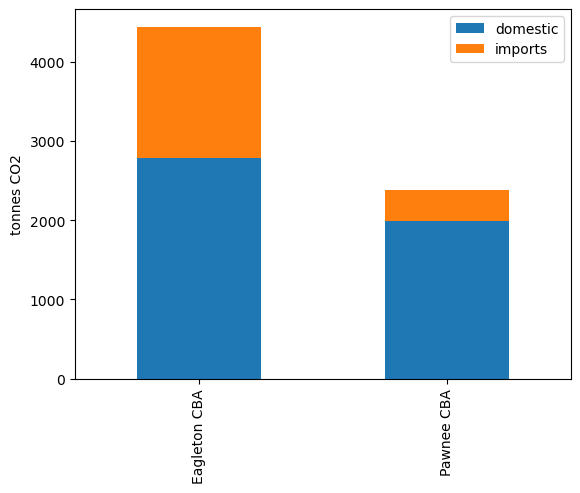

In [80]:
chart = all_data.plot(kind='bar', stacked=True)
chart.set_ylabel('tonnes CO2')

You should have got a graph that looks like this:

<img src="https://github.com/earao/images/blob/main/Screenshot%202023-12-08%20at%2020.23.45.png?raw=true" width=500 height=400/>

Can you see that Eagleton is reliant on imports, whereas Pawnee is a town which is more sufficient. Think about how you might expect the footprints of a developed versus developing country to look if you broke the emissions down by domestic and imports.

## Key learning points

You should have learnt:

<ol>
<li>How to make the individual matrix elements representing the transactions matrix, final demand and emissions</li>
<li>How to make dataframes</li>
<li>How to calculate e and L</li>
<li>How to calculate total footprints, footprints by product and footprints by source industry and end product</li>
<li>How to make bar charts and stacked bar charts of your results</li>
   
</ol>

